**Анализ оттока клиентов банка "Метанпром"**

**Презентация:** https://disk.yandex.ru/i/rceVLHv4K7OQUA

**Дашборд:** https://public.tableau.com/views/_16893628903740/Dashboard12?:language=en-US&:display_count=n&:origin=viz_share_link

**Цель:**

Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка и дать рекомендации по их удержанию.

**Задачи:**

1. Провести исследовательский анализ данных.
2. Выделить сегменты клиентов, которые склонны уходить из банка.
3. Сформулировать и проверить статистические гипотезы.
4. Дать рекомендации по удержанию клиентов.

**Шаг 1.** Загрузим библиотеки и посмотрим на данные.

**Шаг 2.** Предобработаем данные.

**Шаг 3.** Проведем исследовательский анализ данных.

**Шаг 4.** Проверим гипотезы:
- гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались;
- гипотеза о различии активности клиентов, которые ушли с теми, которые остались;
- гипотеза о различии количества используемых банковских продуктов клиентов которые ушли, с теми, которые остались.

**Шаг 5.** Составим высокоотточные сегменты клиентов, которые склонны уходить из банка.

**Шаг 6.** Итоговые выводы и рекомендации для отдела маркетинга.

**Описание данных**

Датасет содержит данные о клиентах банка "Метанпром". Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:
- **userid** - идентификатор пользователя,
- **score** - баллы кредитного скоринга,
- **City** - город,
- **Gender** - пол,
- **Age** - возраст,
- **equity** - количество баллов собственности,
- **Balance** - баланс на счёте,
- **Products** - количество продуктов, которыми пользуется клиент,
- **Credit_Card** - есть ли кредитная карта,
- **last_activity** - активный клиент,
- **estimated_salary** - заработная плата клиента,
- **Churn** - ушёл или нет.

**1. Загрузим библиотеки и посмотрим на данные**

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import warnings
import scipy.stats as st
import math as mth

In [2]:
# Загрузим датасет и посмотрим на данные
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
print('Количество дубликатов:', data.duplicated().sum())
print('Доля дубликатов:', data.duplicated().sum() / len(data) * 100)

Количество дубликатов: 0
Доля дубликатов: 0.0


In [6]:
# Проверим неявные дубликаты
print(data['city'].unique())
print(data['gender'].unique())

['Рыбинск' 'Ярославль' 'Ростов']
['Ж' 'М']


**Вывод**

Импортировали библиотеки и посмотрели на данные. Датасет имеет 10 тысяч строк и 12 столбцов, есть пропуски в столбцах age и balance. Также есть стобцы с неправильными типами данных. Дубликатов нет.

**2. Предобработаем данные**

In [7]:
# Приведем названия столбцов к единому стилю 
data.columns = [col.lower() for col in data.columns]
data =  data.rename(columns = {'userid' : 'user_id'})
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [8]:
# Приведем столбец age к типу данных int
data['age'] = data['age'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   Int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: Int64(1), float64(3), int64(6), object(2)
memory usage: 947.4+ KB


In [9]:
# Посчитаем количество пропусков и долю пропусков в столбцах age и balance
print('Количество пропусков в столбце age:', data['age'].isna().sum())
print('Доля пропусков в столбце age, %:', round(data['age'].isna().sum()/len(data), 4) * 100)

print('Количество пропусков в столбце balance:', data['balance'].isna().sum())
print('Доля пропусков в столбце balance, %:', round(data['balance'].isna().sum()/len(data), 4) * 100)

Количество пропусков в столбце age: 26
Доля пропусков в столбце age, %: 0.26
Количество пропусков в столбце balance: 2295
Доля пропусков в столбце balance, %: 22.95


In [10]:
# Удалим пропуски в столбце age т.к. невозможно подставить правильный возраст, и их доля меньше 1%, это никак не повлияет на анализ
data.drop(data[data['age'].isna()].index, inplace = True)
data = data.reset_index(drop = True)
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9969,120553,814.0,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0
9970,139170,894.0,Ярославль,М,46,0,NaN,1,1,0,196898.29,0
9971,115639,903.0,Ярославль,М,24,0,NaN,2,1,1,108905.09,0
9972,148700,777.0,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0


Количество пропусков в столбце balance - 2295, Доля пропусков - 23%. Это слишком много для того, чтобы их просто убрать. 
В теории можно заменить пропуски средним или медианной значением, но думаю это будет не корректно, это все таки баланс на счете, он индивидуальный.

Попробуем исследовать эти пропуски и возможно просто оставим их.

In [11]:
pd.set_option("display.float_format", "{:.2f}".format)
data['balance'].describe()

count        7695.00
mean       827245.59
std       1980327.41
min             0.00
25%        295698.71
50%        524295.33
75%        980051.21
max     119113552.01
Name: balance, dtype: float64

In [12]:
# Cвязаны ли пропуски с оттоком клиента из банка

data[data['balance'].isna()]['churn'].value_counts()

0    2266
1      13
Name: churn, dtype: int64

In [13]:
# Cвязаны ли пропуски с городом в котором находится банк

data[data['balance'].isna()]['city'].value_counts()

Ярославль    1458
Рыбинск       586
Ростов        235
Name: city, dtype: int64

In [14]:
# Cвязаны ли пропуски с гендером

data[data['balance'].isna()]['gender'].value_counts()

М    1272
Ж    1007
Name: gender, dtype: int64

Пропуски не могут быть нулевым значением, потому что нулевые значения присутствуют. Они не связаны с тем, ушел ли клиент или нет, а также не связаны с гендером.

Зафиксировано большое количество пропусков в Ярославле, но как-то это связать с другими пропусками мы не можем.

Мы не можем определить почему произошли пропуски, поэтому оставим эти данные как есть.

In [15]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.00,9974.00,9974.00,9974.00,7695.00,9974.00,9974.00,9974.00,9974.00,9974.00
mean,171755.22,848.68,42.73,2.63,827245.59,1.87,0.68,0.52,147786.81,0.18
std,33695.53,65.40,12.18,1.98,1980327.41,0.79,0.47,0.50,139285.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142760.00,802.00,33.00,0.00,295698.71,1.00,0.00,0.00,75251.66,0.00
50%,172643.00,853.00,40.00,3.00,524295.33,2.00,1.00,1.00,119626.79,0.00
75%,201163.75,900.00,51.00,4.00,980051.21,2.00,1.00,1.00,174499.81,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


В целом, пости все столбцы нормально распределены. Есть большие выбросы в максимальном значении баланса, но думаю это связано с тем, что это баланс очень богатых клиентов.

**Вывод**

1. Привели название столбцов к единому стилю.
2. Убрали пропуски в столбце age.
3. Исследовали пропуски в столбце balance и оставили их без изменений.

**3. Исследовательский анализ данных**

In [16]:
# Посмотрим статистику
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
user_id,9974.00,171755.22,33695.53,94561.00,142760.00,172643.00,201163.75,229145.00
score,9974.00,848.68,65.40,642.00,802.00,853.00,900.00,1000.00
age,9974.00,42.73,12.18,18.00,33.00,40.00,51.00,86.00
equity,9974.00,2.63,1.98,0.00,0.00,3.00,4.00,9.00
balance,7695.00,827245.59,1980327.41,0.00,295698.71,524295.33,980051.22,119113552.01
products,9974.00,1.87,0.79,0.00,1.00,2.00,2.00,5.00
credit_card,9974.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
last_activity,9974.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
est_salary,9974.00,147786.81,139285.51,2546.30,75251.66,119626.80,174499.81,1395064.45
churn,9974.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00


In [17]:
# Посмотрим на средние и стандартные отклонения признаков
gender = {'Ж' : 0, 'М' : 1}
data_mean_std = data.replace({'gender' : gender}).agg(['mean', 'std']).T.round(2)
data_mean_std

,mean,std
user_id,171755.22,33695.53
score,848.68,65.40
gender,0.50,0.50
age,42.73,12.18
equity,2.63,1.98
balance,827245.59,1980327.41
products,1.87,0.79
credit_card,0.68,0.47
last_activity,0.52,0.50
est_salary,147786.81,139285.51


Средний отток клиентов 18%.

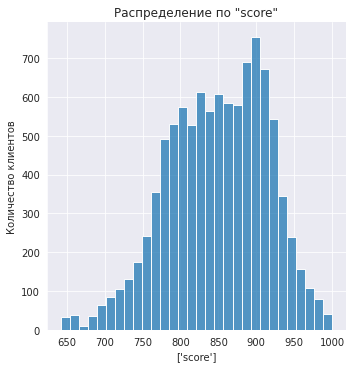

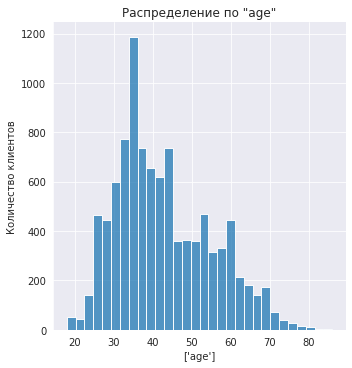

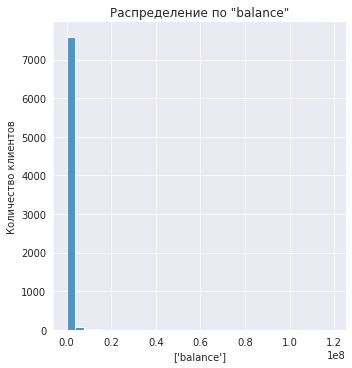

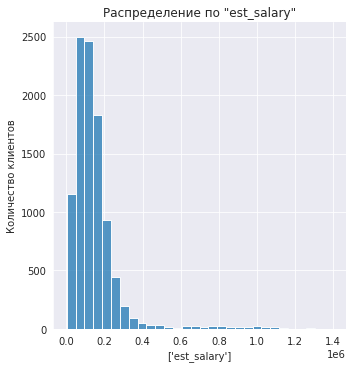

In [18]:
# Рассмотрим распределение количественных признаков
df_quantitative = data[['score', 'age', 'balance', 'est_salary']]
pd.set_option("display.float_format", "{:.2f}".format)
with sns.axes_style('darkgrid'):
    for col in df_quantitative.columns:
        A = data[col]
        A_no_nan = A[~np.isnan(A)]
    
        sns.displot(A_no_nan, kde=False, bins=30)
        plt.title(f'Распределение по "{col}"')
        plt.xlabel([col])
        plt.ylabel('Количество клиентов')
        plt.show()

**Промежуточный вывод.**

В целом распределение выглядит нормально. Есть большие максимальные значения в зарплате и балансе. Скорее всего это богатые клиенты.

Самое большое количество клиентов собрано по количеству баллов в промежутке от 750 до 950 и в возрасте от 25 до 45 лет.

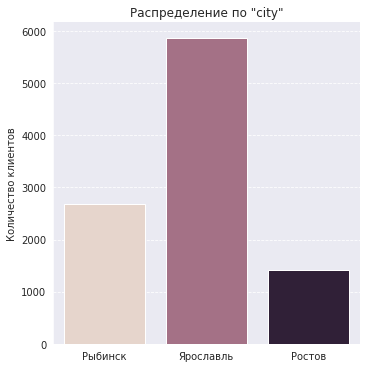

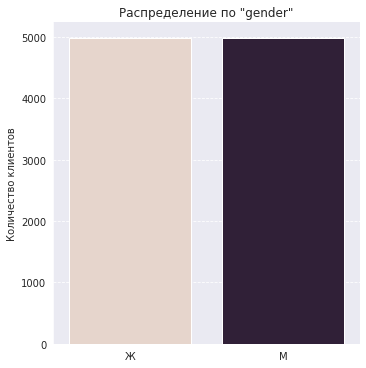

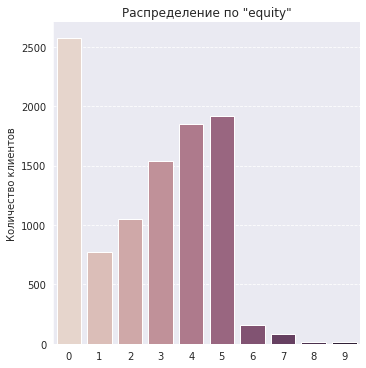

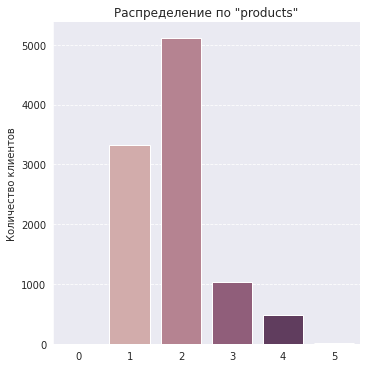

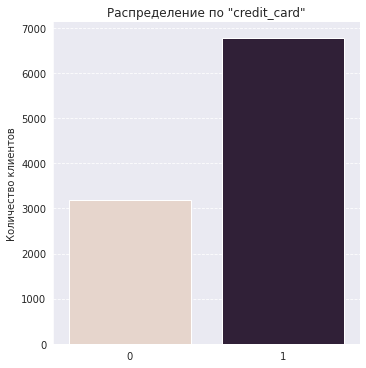

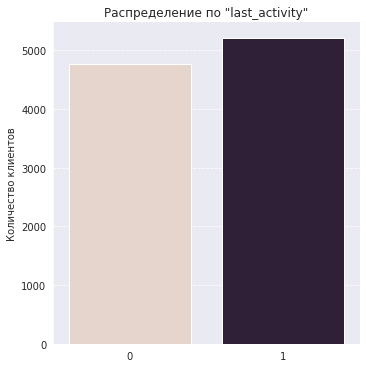

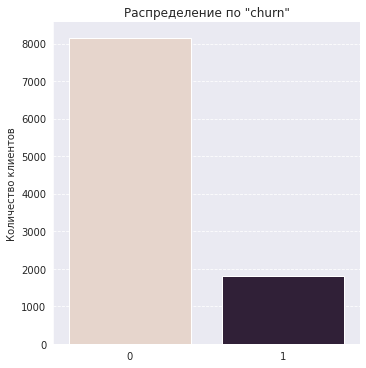

In [19]:
# Рассмотрим распределение категориальных и дискретных признаков
df_quantitative = data[['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn']]
pd.set_option("display.float_format", "{:.2f}".format)
with sns.axes_style('darkgrid'):
    for col in df_quantitative.columns:
        sns.catplot(x=col, kind='count', palette="ch:.1", data=data)
        plt.title(f'Распределение по "{col}"')
        plt.xlabel('')
        plt.ylabel('Количество клиентов')
        plt.grid(True, axis='y', linestyle='--')
        plt.show()

**Промежуточный вывод 2.**

1. Больше всего клиентов в Ярославле - почти 6 тысяч, потом Рыбинск - чуть больше 2,5 тысяч, и Ростов - около 1,5 тысяч. 

Количество женщин и мужчин составляет 50% на 50%. 

Количество баллов собственности в большинстве своем находятся от 0 до 5.

Клиенты чаще всего используют 1 или 2 продукта банка.

Примерно у 30% клиентов есть кредитная карта.

В банке примерно 50% на 50% активных и неактивных клиентов.

Из банка ушло примерно 18% клиентов.

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


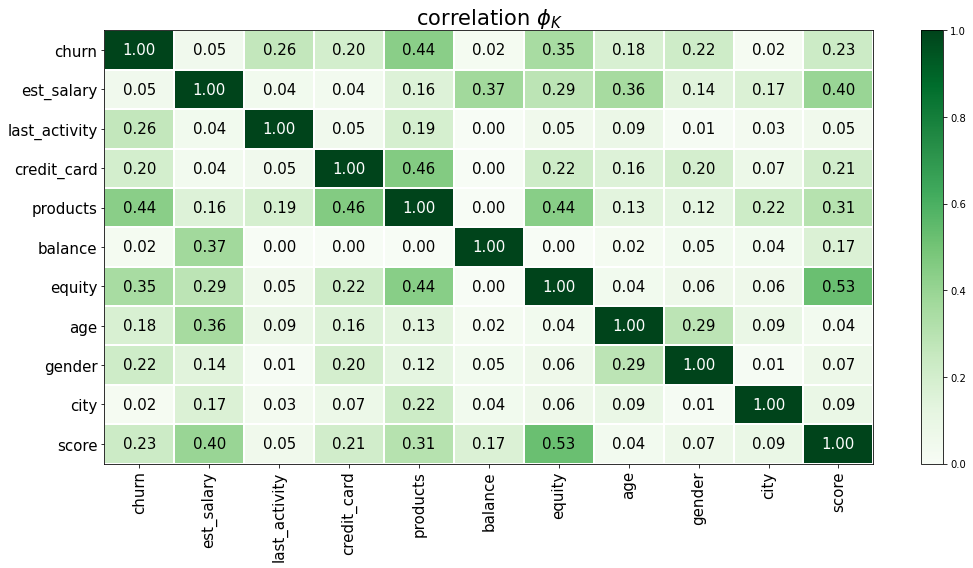

In [20]:
# Построим корреляцию phik
!pip install phik
data_without_user = data.drop('user_id', axis = 1)
import phik
from phik.report import plot_correlation_matrix
from phik import report
phik_overview = data_without_user.phik_matrix()
phik_overview
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(15, 8))
plt.tight_layout()

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


<AxesSubplot:title={'center':'Корреляция оттока клиентов'}>

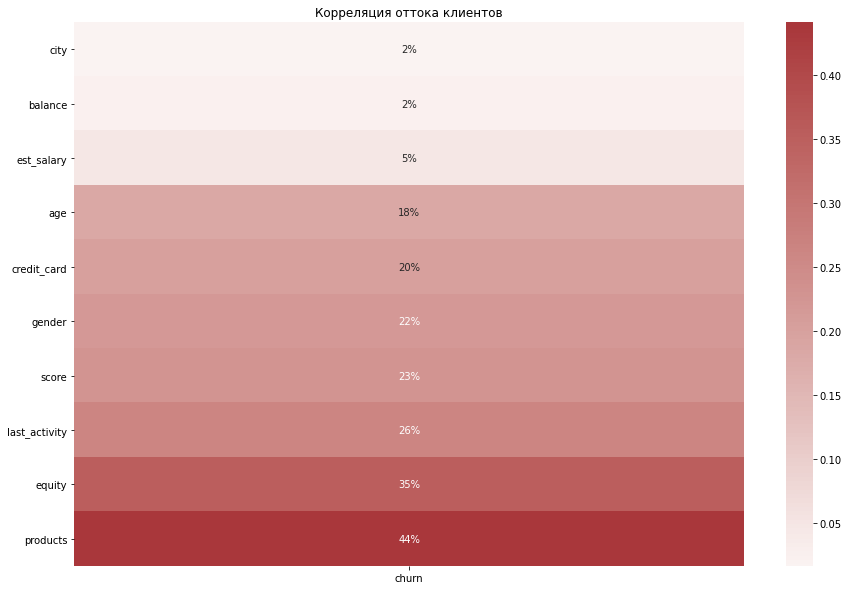

In [21]:
plt.figure(figsize=(15, 10))
plt.title('Корреляция оттока клиентов')
sns.heatmap(data_without_user.phik_matrix().loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt=".0%", cmap="vlag", center=0)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'gender_Ж', 'gender_М']


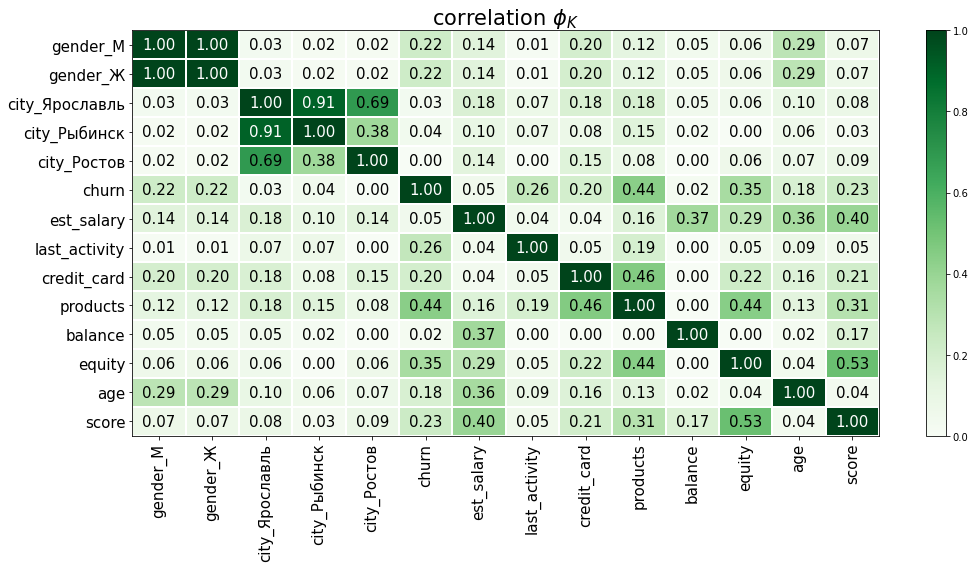

In [22]:
# Построим корреляцию phik с каждым городом и гендером отдельно
import phik
from phik.report import plot_correlation_matrix
from phik import report
data_binar = pd.get_dummies(data, columns=['city','gender'])
data_binar_2 = pd.get_dummies(data_without_user, columns=['city','gender'])
phik_overview = data_binar_2.phik_matrix()
phik_overview
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(15, 8))
plt.tight_layout()

**Промежуточный вывод 2.**

В целом мы видим небольшую корреляцию между параметрами. Нас интересует столбец с оттоком клиентов churn. 

Выделяются соотношения:
1. Оттока с количеством продуктов, которыми пользуется клиент;
2. Оттока с количеством баллов собственности;
3. Оттока со значением активного клиента.

Рассмотрим отток клиентов по разным признакам

,sum,count,%
city,,,
Ростов,265,1416,18.71
Рыбинск,437,2683,16.29
Ярославль,1117,5875,19.01


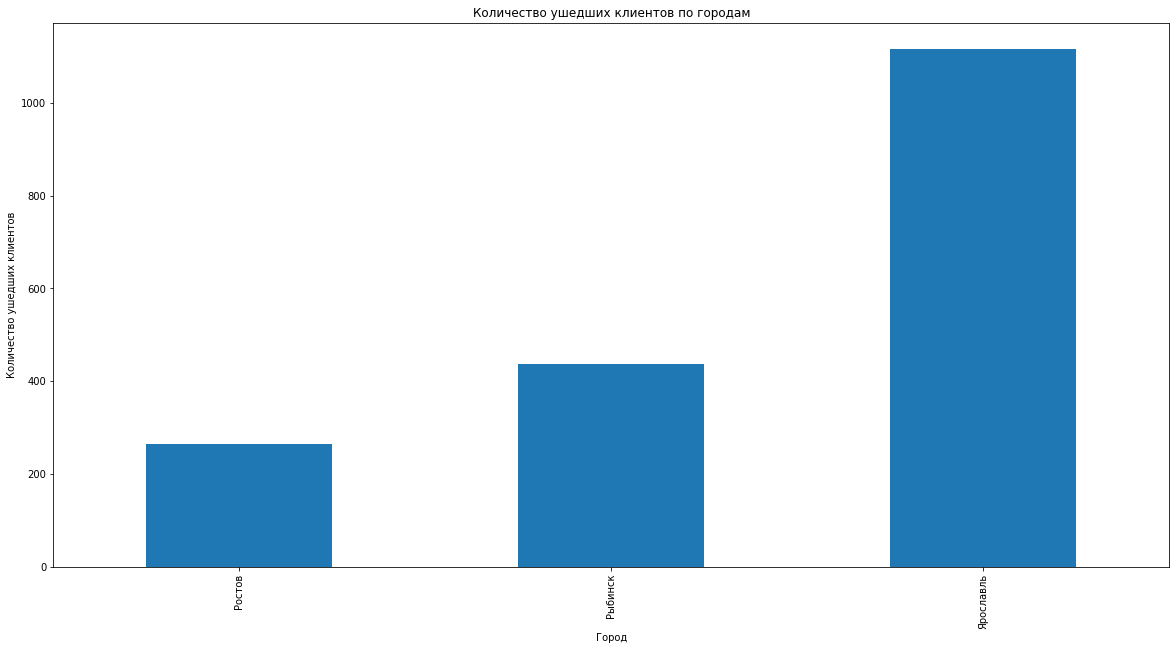

In [23]:
# Отток по городам
city_churn = data.groupby('city')['churn'].agg(['sum', 'count'])
city_churn['%'] = city_churn['sum'] / city_churn['count'] * 100

city_churn['sum'].plot(kind = 'bar', figsize = (20,10), title = 'Количество ушедших клиентов по городам',
                      xlabel = 'Город', ylabel = 'Количество ушедших клиентов')

city_churn

,sum,count,%
gender,,,
Ж,636,4983,12.76
М,1183,4991,23.70


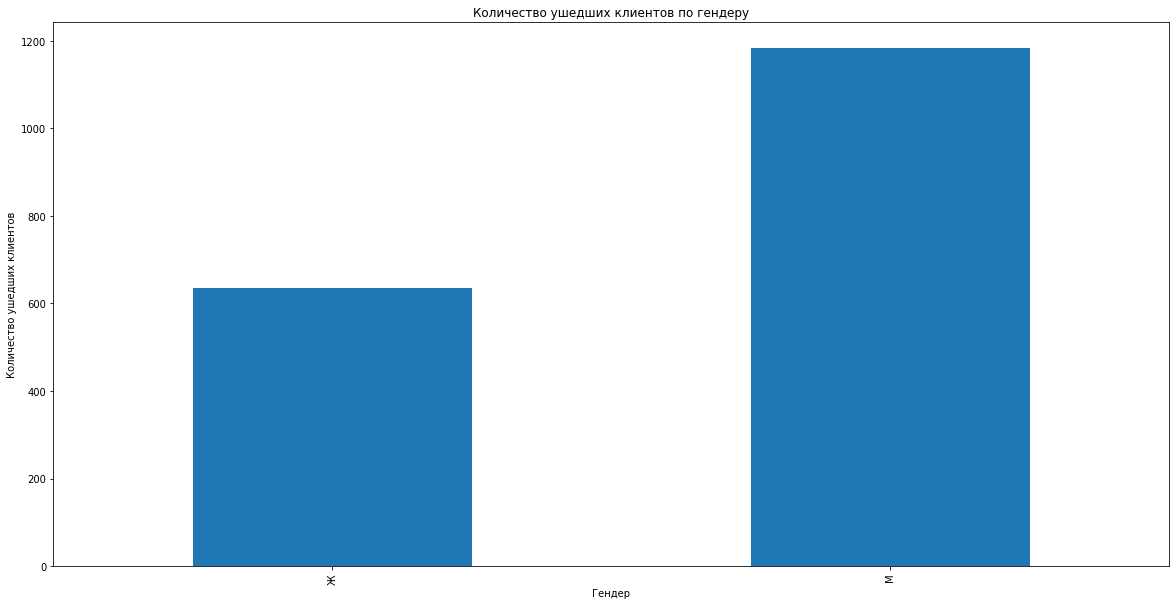

In [24]:
# Отток по гендеру
gender_churn = data.groupby('gender')['churn'].agg(['sum', 'count'])
gender_churn['%'] = gender_churn['sum'] / gender_churn['count'] * 100

gender_churn['sum'].plot(kind = 'bar', figsize = (20,10), title = 'Количество ушедших клиентов по гендеру',
                      xlabel = 'Гендер', ylabel = 'Количество ушедших клиентов')

gender_churn

,sum,count,%
age,,,
18,1,13,7.69
19,1,16,6.25
20,3,23,13.04
21,4,15,26.67
22,4,27,14.81
...,...,...,...
81,0,4,0.00
82,0,2,0.00
83,0,3,0.00


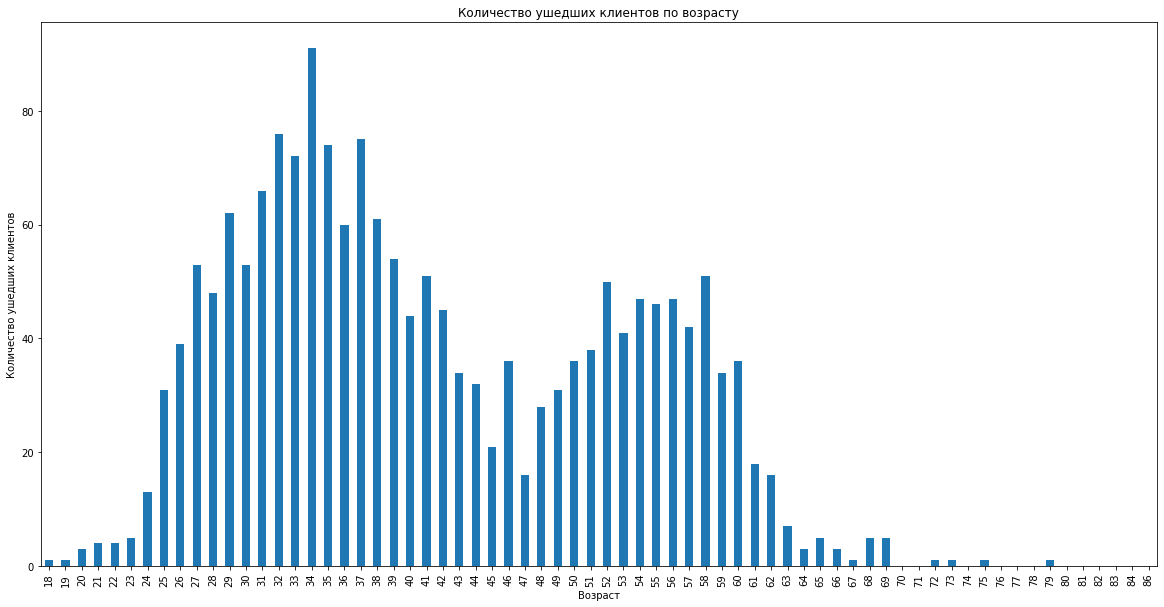

In [25]:
# Отток по возрасту
age_churn = data.groupby('age')['churn'].agg(['sum', 'count'])
age_churn['%'] = age_churn['sum'] / age_churn['count'] * 100

age_churn['sum'].plot(kind = 'bar', figsize = (20,10), title = 'Количество ушедших клиентов по возрасту',
                      xlabel = 'Возраст', ylabel = 'Количество ушедших клиентов')

age_churn

,sum,count,%
equity,,,
0,90,2576,3.49
1,93,773,12.03
2,166,1051,15.79
3,322,1541,20.90
4,464,1847,25.12
5,576,1915,30.08
6,58,161,36.02
7,37,80,46.25
8,6,17,35.29


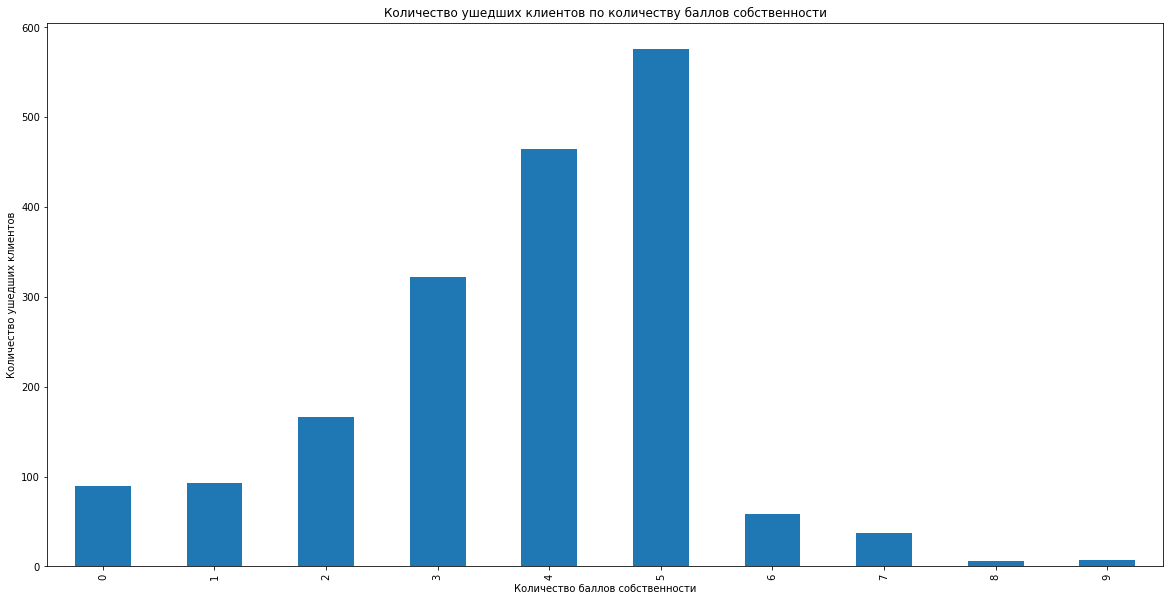

In [26]:
# Отток по количеству баллов
equity_churn = data.groupby('equity')['churn'].agg(['sum', 'count'])
equity_churn['%'] = equity_churn['sum'] / equity_churn['count'] * 100

equity_churn['sum'].plot(kind = 'bar', figsize = (20,10), title = 'Количество ушедших клиентов по количеству баллов собственности',
                      xlabel = 'Количество баллов собственности', ylabel = 'Количество ушедших клиентов')

equity_churn

,sum,count,%
products,,,
0,1,1,100.00
1,235,3323,7.07
2,978,5119,19.11
3,297,1038,28.61
4,300,474,63.29
5,8,19,42.11


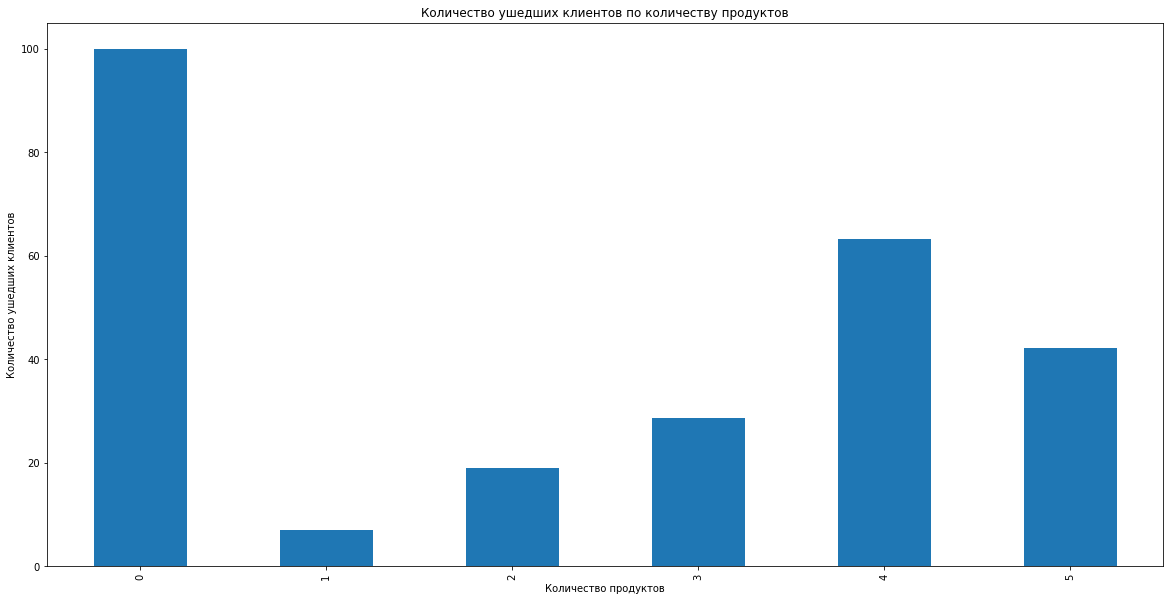

In [27]:
# Отток по количеству продуктов
products_churn = data.groupby('products')['churn'].agg(['sum', 'count'])
products_churn['%'] = products_churn['sum'] / products_churn['count'] * 100

products_churn['%'].plot(kind = 'bar', figsize = (20,10), title = 'Количество ушедших клиентов по количеству продуктов',
                      xlabel = 'Количество продуктов', ylabel = 'Количество ушедших клиентов')

products_churn

,sum,count,%
credit_card,,,
0,816,3190,25.58
1,1003,6784,14.78


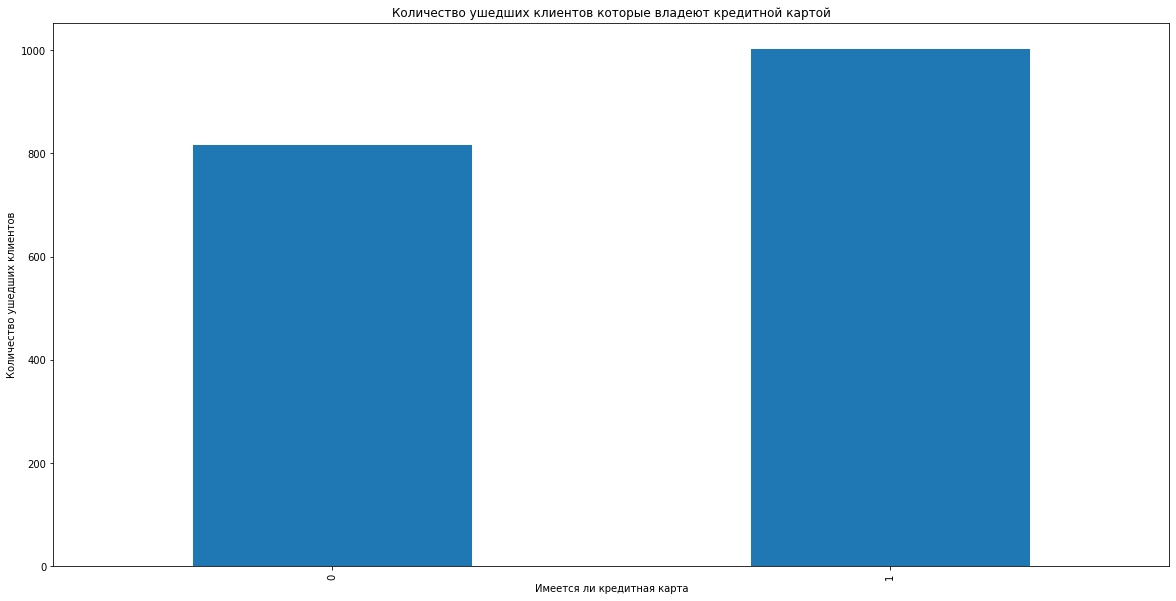

In [28]:
# Отток по клиентам, которые имеют кредитную карту
credit_churn = data.groupby('credit_card')['churn'].agg(['sum', 'count'])
credit_churn['%'] = credit_churn['sum'] / credit_churn['count'] * 100

credit_churn['sum'].plot(kind = 'bar', figsize = (20,10), title = 'Количество ушедших клиентов которые владеют кредитной картой',
                      xlabel = 'Имеется ли кредитная карта', ylabel = 'Количество ушедших клиентов')

credit_churn

,sum,count,%
last_activity,,,
0,542,4759,11.39
1,1277,5215,24.49


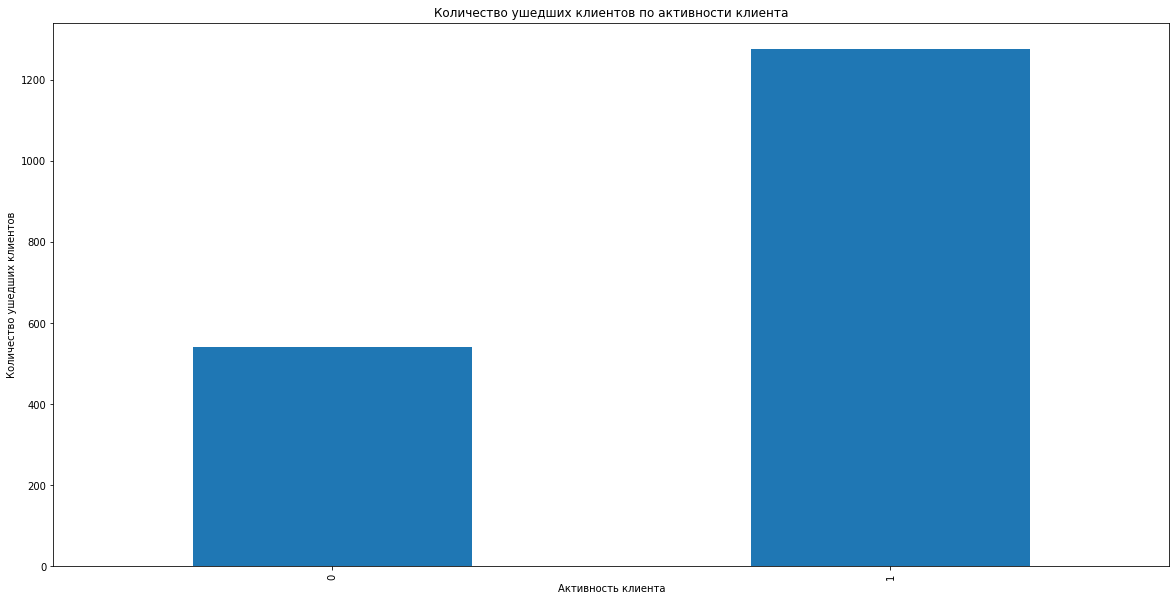

In [29]:
# Отток по активности клиента
activity_churn = data.groupby('last_activity')['churn'].agg(['sum', 'count'])
activity_churn['%'] = activity_churn['sum'] / activity_churn['count'] * 100

activity_churn['sum'].plot(kind = 'bar', figsize = (20,10), title = 'Количество ушедших клиентов по активности клиента',
                      xlabel = 'Активность клиента', ylabel = 'Количество ушедших клиентов')

activity_churn

**Вывод**

1. Больше всего клиентов в Ярославле - почти 6 тысяч, а также самый большой отток клиентов - больше 1 тысячи человек (19% оттока). Рыбинск имеет чуть больше 2,5 тысяч клиентов, из них 437 отточных клиентов (16,3% оттока) и в Ростове около 1,5 тысяч клиентов, отточных клиентов 265 (18,7% оттока).
2. Количество женщин и мужчин составляет 50% на 50%. Отток клиентов мужчин составляет 23,7% от общего числа клиентов мужчин, у женщин - 12,8% от общего числа клиентов женщин.
3. Количество ушедших клиентов по возрасту разбросаны в диапазоне от 25 до 60 лет с пиковыми значениями в 29-38 лет.
4. Количество баллов собственности в большинстве своем находятся от 0 до 5. Есть зависимость, что чем больше количество баллов собственности у клиентов, тем больший % оттока.
5. Клиенты чаще всего используют 1 или 2 продукта банка. Так же как и с количеством баллов собственности. Чем больше продуктов банка используют клиенты - тем больший % оттока. Исключение - клиенты с 5 продуктами.
6. Примерно у 30% клиентов есть кредитная карта и отток таких клиентов составляет примерно 25,6% от количества клиентов с кредитной картой. Отток клиентов, у которых нет кредитной карты составляет 14,8% от общего количества клиентов без кредитной карты.
7. В банке примерно 50% на 50% активных и неактивных клиентов. Отток активных клиентов составляет 11,4% от общего числа активных клиентов, не активных - 24,5% от общего числа неактивных клиентов.
9. Из банка ушло примерно 18% клиентов.

**Шаг 4. Проверим гипотезы**

1. Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались.

Сформулируем нулевую и альтернативную гипотезу.

H0: Между группами "ушел" и "остался" нет различия в доходах.

H1: Между группами "ушел" и "остался" есть различие в доходах.

In [30]:
# Посмотрим данные по доходам клиентам в разбивке по оттоку
data.groupby('churn')['est_salary'].agg(['mean','median','std']).round(2)

,mean,median,std
churn,,,
0,147674.64,118227.60,142684.41
1,148289.70,125395.22,122932.16


In [31]:
results = st.ttest_ind(
    data[data['churn'] == 0]['est_salary'],
    data[data['churn'] == 1]['est_salary'], equal_var = False)

alpha = .05
print('alpha:', alpha)
print ('p-value:', results.pvalue) 
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

alpha: 0.05
p-value: 0.8515799588935961
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Нулевую гипотезу не отвергаем. Между группами "ушел" и "остался" статистически значимых различий доходов нет.

2. Гипотеза о различии активности клиентов, которые ушли с теми, которые остались.

Сформулируем нулевую и альтернативную гипотезу.

H0: Между группами "ушел" и "остался" нет различий в активности.

H1: Между группами "ушел" и "остался" есть различия в активности.

In [32]:
# Посмотрим данные по активности клиентов в разбивке по оттоку
data.groupby('churn')['last_activity'].agg(['mean','std']).round(2)

,mean,std
churn,,
0,0.48,0.50
1,0.70,0.46


In [33]:
results = st.ttest_ind(
    data[data['churn'] == 0]['last_activity'],
    data[data['churn'] == 1]['last_activity'], equal_var = False)

alpha = .05
print('alpha:', alpha)
print ('p-value:', results.pvalue) 
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

alpha: 0.05
p-value: 8.100190763155924e-70
Отвергаем нулевую гипотезу


**Вывод**

Нулевую гипотезу отвергаем. Между группами "ушел" и "остался" есть статистически значимые различия в активности клиента.

3. Гипотеза о различии количества используемых банковских продуктов клиентов которые ушли, с теми, которые остались

Сформулируем нулевую и альтернативную гипотезу.

H0: Между группами "ушел" и "остался" нет различий в количестве продуктов, которые используют клиенты.

H1: Между группами "ушел" и "остался" есть различия в количестве продуктов, которые используют клиенты.

In [34]:
# Посмотрим данные по активности клиентов в разбивке по оттоку
data.groupby('churn')['products'].agg(['mean','std']).round(2)

,mean,std
churn,,
0,1.76,0.71
1,2.38,0.92


In [35]:
results = st.ttest_ind(
    data[data['churn'] == 0]['products'],
    data[data['churn'] == 1]['products'], equal_var = False)

alpha = .05
print('alpha:', alpha)
print ('p-value:', results.pvalue) 
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

alpha: 0.05
p-value: 7.537464337201273e-138
Отвергаем нулевую гипотезу


**Вывод**

Нулевую гипотезу отвергаем. Между группами "ушел" и "остался" есть статистически значимые различия в количестве продуктов, которые используют.

**Шаг 5.** Составим высокоотточные сегменты клиентов, которые склонны уходить из банка.

**Сегмент 1. Доля отточных клиентов 64,5%.**

**Характеристики:**
- гендер: мужской;
- количество баллов собственности: больше или равно 4;
- баллы кредитного скоринга: больше или равно 830;
- количество продуктов, которыми пользуется клиент: больше 1;
- активный клиент: нет.

In [36]:
# Вывод данных по сегменту
print('\033[1mСегмент 1\033[0m')
print ('Общее количество клиентов:', data_binar.query('gender_М == 1 and equity >= 4 and score >= 830 and products > 1 \
                                and last_activity == 1')['user_id'].count())

print ('Количество отточных клиентов:', data_binar.query('gender_М == 1 and churn==1 and equity >= 4 and score >= 830 \
                                    and products > 1 and last_activity == 1')['user_id'].count())

print ('Доля отточных клиентов:', data_binar.query('churn==1 and gender_М == 1 and churn==1 and equity >= 4 \
                            and score >= 830 and products > 1 and last_activity == 1')['user_id'].count() / 
       data_binar.query('gender_М == 1 and equity >= 4 and score >= 830 and products > 1 \
                        and last_activity == 1')['user_id'].count() * 100)

Сегмент 1
Общее количество клиентов: 609
Количество отточных клиентов: 393
Доля отточных клиентов: 64.5320197044335


**Сегмент 2. Доля отточных клиентов 60,4%.**

**Характеристики:**
- возраст: больше или равен 29 и меньше или равен 37;
- количество баллов собственности: больше или равно 3;
- баллы кредитного скоринга: больше или равно 830;
- активный клиент: нет.

In [37]:
# Вывод данных по сегменту
print('\033[1mСегмент 2\033[0m')
print ('Общее количество клиентов:', data_binar.query('age >= 29 and age <= 37 and last_activity == 1 \
                                and equity >= 3 and score >= 830')['user_id'].count())

print ('Количество отточных клиентов:', data_binar.query('churn==1 and age >= 29 and age <= 37 and last_activity == 1 \
                                and equity >= 3 and score >= 830')['user_id'].count())

print ('Доля отточных клиентов:', data_binar.query('churn==1 and age >= 29 and age <= 37 and last_activity == 1 \
                            and equity >= 3 and score >= 830')['user_id'].count() / 
                                  data_binar.query('age >= 29 and age <= 37 and last_activity == 1 \
                                and equity >= 3 and score >= 830')['user_id'].count() * 100)

Сегмент 2
Общее количество клиентов: 631
Количество отточных клиентов: 381
Доля отточных клиентов: 60.38034865293186


**Сегмент 3. Доля отточных клиентов 59,8%.**

**Характеристики:**
- кредитная карта: есть;
- количество продуктов, которыми пользуется клиент: больше 1;
- баллы кредитного скоринга: больше 850;
- активный клиент: нет.

In [38]:
# Вывод данных по сегменту
print('\033[1mСегмент 3\033[0m')
print ('Общее количество клиентов:', data_binar.query('score > 850 and last_activity == 1 \
                                and credit_card == 0 and products > 1')['user_id'].count())

print ('Количество отточных клиентов:', data_binar.query('churn==1 and score > 850 \
                                and last_activity == 1 and credit_card == 0  and products > 1')['user_id'].count())

print ('Доля отточных клиентов:', data_binar.query('churn==1 and score > 850 and last_activity == 1 \
                            and credit_card == 0  and products > 1')['user_id'].count() / 
                                  data_binar.query('score > 850 and last_activity == 1 \
                            and credit_card == 0  and products > 1')['user_id'].count() * 100)

Сегмент 3
Общее количество клиентов: 761
Количество отточных клиентов: 455
Доля отточных клиентов: 59.78975032851511


**Сегмент 4. Доля отточных клиентов 59,6%.**

**Характеристики:**
- количество баллов собственности: больше или равно 5;
- количество продуктов, которыми пользуется клиент: больше или равно 2;
- баллы кредитного скоринга: больше или равно 850;
- активный клиент: нет.

In [39]:
# Вывод данных по сегменту
print('\033[1mСегмент 4\033[0m')
print ('Общее количество клиентов:', data_binar.query('score >= 850 and equity >= 5 \
                                and products >= 2 and last_activity == 1')['user_id'].count())

print ('Количество отточных клиентов:', data_binar.query('churn==1 and score >= 850 and equity >= 5 \
                                and products >= 2 and last_activity == 1')['user_id'].count())

print ('Доля отточных клиентов:', data_binar.query('churn==1 and score >= 850 and equity >= 5 \
                            and products >= 2 and last_activity == 1')['user_id'].count() / 
                                  data_binar.query('score >= 850 and equity >= 5 \
                            and products >= 2 and last_activity == 1')['user_id'].count() * 100)

Сегмент 4
Общее количество клиентов: 636
Количество отточных клиентов: 379
Доля отточных клиентов: 59.59119496855346


**Сегмент 5. Доля отточных клиентов 54,2%.**

**Характеристики:**
- гендер: мужской;
- количество баллов собственности: больше 3;
- количество продуктов, которыми пользуется клиент: больше 1;
- кредитная карта: есть;
- баллы кредитного скоринга: больше или равно 800.

In [40]:
# Вывод данных по сегменту
print('\033[1mСегмент 5\033[0m')
print ('Общее количество клиентов:', data_binar.query('equity > 3 and gender_М == 1 and products > 1 \
                                and credit_card == 0 and score >= 800')['user_id'].count())

print ('Количество отточных клиентов:', data_binar.query('churn==1 and equity > 3 and gender_М == 1 and products > 1 \
                                and credit_card == 0 and score >= 800')['user_id'].count())

print ('Доля отточных клиентов:', data_binar.query('churn==1 and equity > 3 and gender_М == 1 and products > 1 \
                                and credit_card == 0 and score >= 800')['user_id'].count() / 
                                  data_binar.query('equity > 3 and gender_М == 1 and products > 1 \
                                and credit_card == 0 and score >= 800')['user_id'].count() * 100)

Сегмент 5
Общее количество клиентов: 618
Количество отточных клиентов: 335
Доля отточных клиентов: 54.20711974110033


**Сегмент 6. Доля отточных клиентов 43,7%.**

**Характеристики:**
- город: Ярославль;
- гендер: мужской;
- количество баллов собственности: больше 4.

In [41]:
# Вывод данных по сегменту
print('\033[1mСегмент 6\033[0m')
print ('Общее количество клиентов:', data_binar.query('city_Ярославль == 1 and gender_М == 1 \
                                    and equity > 4')['user_id'].count())

print ('Количество отточных клиентов:', data_binar.query('churn==1 and city_Ярославль == 1 and gender_М == 1 \
                                    and equity > 4')['user_id'].count())

print ('Доля отточных клиентов:', data_binar.query('churn==1 and city_Ярославль == 1 and gender_М == 1 \
                                    and equity > 4')['user_id'].count() / 
                                  data_binar.query('city_Ярославль == 1 and gender_М == 1 \
                                    and equity > 4')['user_id'].count() * 100)

Сегмент 6
Общее количество клиентов: 671
Количество отточных клиентов: 293
Доля отточных клиентов: 43.666169895678095


**Шаг 6.** Итоговые выводы и рекомендации для отдела маркетинга.

**Итоговый вывод.**

Проанализировав всех клиентов банка можно сказать, что:
- больше всего клиентов в Ярославле - почти 6 тысяч, в Рыбинске чуть больше 2,5 тысяч, в Ростове около 1,5 тысяч;
- количество клиентов женщин и мужчин составляет по 50%;
- самое больше количество клиентов в возрасте от 30 до 60 лет;
- количество баллов собственности в большинстве своем находятся в значениях от 0 до 5;
- клиенты чаще всего пользуются 1 или 2 продуктами банка.
- примерно у 30% клиентов есть кредитная карта;
- активных клиентов банка примерно 50%;
- отток клиентов из банка составляет примерно 18%.

Проанализировав отток клиентов из банка можно сказать, что:
- самый большой отток клиентов в Ярославле - больше 1 тысячи (19% оттока от всех клиентов города Ярославль). Рыбинск - 437 отточных клиентов (16,3% оттока от всех клиентов города Рыбинск). Ростов - 265 отточных клиентов (18,7% оттока от всех клиентов города Ростов);
- отток клиентов мужчин составляет 23,7% от общего числа клиентов мужчин, у женщин - 12,8% от общего числа клиентов женщин;
- количество ушедших клиентов по возрасту разбросаны в диапазоне от 25 до 60 лет с пиковыми значениями в 29-38 лет и 52-58 лет;
- есть зависимость, что чем больше количество баллов собственности у клиентов, тем больший % оттока;
- чем больше продуктов банка используют клиенты - тем больший % оттока. Исключение - клиенты с 5 продуктами;
- отток клиентов у которых есть кредитная карта составляет примерно 25,6% от количества клиентов с кредитной картой. Отток клиентов, у которых нет кредитной карты составляет 14,8% от общего количества клиентов без кредитной карты;
- отток активных клиентов составляет 11,4% от общего числа активных клиентов, не активных - 24,5% от общего числа неактивных клиентов.

**Рекомендации для отдела маркетинга.**

**Общие рекомендации.**

1. Исследовать причины оттока и разработать меры для снижения оттока клиентов в городе Ярославль и оттока клиентов мужского пола.
2. Уделить особое внимание клиентам в возрасте 29-38 и 52-58 лет. Провести анализ чтобы определить причины оттока и предложить меры для удержания клиентов.
3. Разработать стратегию для удержания клиентов с высоким количеством баллов собственности. Возможно стоит предложить индивидуальные предложения для таких клиентов, чтобы увеличить их удовлетворенность услугами банка.
4. Разработать меры по стимулированию клиентов использовать больше продуктов банка и повысить их лояльность.
5. Для клиентов с кредитными картами предложить дополнительные преимущества и программы лояльности. Также проработать предложения для клиентов без кредитных карт.
6. Сосредоточиться на удержании активных клиентов. Возможно разработать программы и акции, которые будут способствовать удержанию активных клиентов и повышению их лояльности.

**По сегментам.** 

В целом они похожи друг на друга. Чаще всего характеристики клиента, который ушел из банка это:
- мужчина;
- возраст в районе 29-38 лет и 52-68 лет;
- количеством баллов собственности больше 3;
- использует больше 1 продукта в банке;
- имеет кредитный скоринг больше 800;
- не является активным клиентом.

Рекомендую повышать активность клиентов:
- информировать о новых продуктах банка;
- предложить повышенный кэшбэк на мужские категории;
- оформлять потребительский кредит на очень выгодных условиях;
- улучшить условия для ипотечного кредита (для молодых клиентов);
- улучшить условия пенсионной программы (для пожилых клиентов);
- улучшить условия для дебетовой карты.